# COVID in Hong Kong

The Hong Kong government provides data about COVID at https://data.gov.hk/endata/dataset/hk-dh-chpsebcddr-novel-infectious-agent, and you can get a daily summary
at https://www.chp.gov.hk/files/pdf/local_situation_covid19_en.pdf.

a) Download “Latest situation of reported cases of COVID-19 in Hong Kong (English)”. The CSV file records the number of COVID cases in Hong Kong from 8/1/2020 up to the
date of your download. Consider four columns.

 As of date

 Number of confirmed cases

 Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests

 Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests

Since 1/1/2022, the government no longer announces the number of confirmed cases but
the number of positive cases in nucleic acid tests and rapid antigen tests. Although it is
inaccurate, define the number of confirmed cases since then as the sum of the two types
of positive cases.

Plot the number of (confirmed) cases and its 7-day moving average. The data of each year is separated into three subplots that share a common horizontal axis.
(Strictly speaking, it is impossible to do so because 2020 has 366 days; but for simplicity, you may drop its data of any one day and thus treat 2020 as a common year.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#%% get data
df = pd.read_csv("latest_situation_of_reported_cases_covid_19_eng.csv")

#%% data cleaning
df['Number of confirmed cases'].fillna(0, inplace = True)
df['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'].fillna(0, inplace = True)
df['Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests'].fillna(0, inplace = True)
df['Number of confirmed cases'] = \
    df['Number of confirmed cases'] \
        + df['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'] \
            + df['Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests']
df.drop([20], inplace = True)
df = df.reset_index(drop=True)
daily_cases =df['Number of confirmed cases'].shift(-1) - df['Number of confirmed cases'] 
daily_cases[1057]=daily_cases[1056]

for i in range(1058):
    if daily_cases[i]<0:
        daily_cases[i]=0

#%% year1: 2021 year2: 2022
for i in range(len(df)):
    if df['As of date'][i][-1] == '1':
        break
year1 = i
for j in range(len(df)):
    if df['As of date'][j][-1] == '2':
        break
year2 = j

df['As of date'] = df['As of date'].str[:5]

<Figure size 900x600 with 0 Axes>

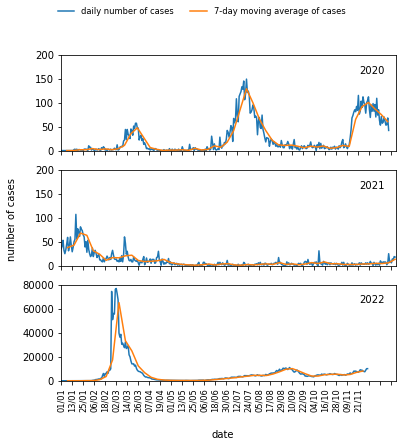

In [3]:
#%% figure 1
plt.figure(dpi= 150)
fig, axes = plt.subplots(3, 1, sharex='col', figsize=(6,6))

axes[0].plot(df['As of date'][0:year1], daily_cases[0:year1], label = 'daily number of cases')
axes[0].plot([df['As of date'][i] for i in range(6, year1, 7)],\
             [np.mean(daily_cases[i:(i + 7)]) for i in range(0, year1 - 7, 7)], \
                 label = '7-day moving average of cases')
axes[0].text(325, 160, '2020')
axes[0].set_ylim([0,200])


axes[1].plot(df['As of date'][year1 :year2], daily_cases[year1 :year2],\
             label = 'daily number of cases')
axes[1].plot([df['As of date'][i] for i in range(year1 + 7, year2, 7)], \
             [np.mean(daily_cases[i:(i + 7)]) for i in range(year1, year2 - 7, 7)], \
                 label = '7-day moving average of cases')
axes[1].set_ylim([0,200])
axes[1].text(325, 160, '2021')


axes[2].plot(df['As of date'][year2 :], daily_cases[year2 :], label = 'daily number of cases')
axes[2].plot([df['As of date'][i] for i in range(year2 + 7, len(df), 7)],\
             [np.mean(daily_cases[i:(i + 7)]) for i in range(year2, len(df) - 7, 7)],\
                 label = '7-day moving average of cases')
    
axes[2].text(325, 65000, '2022')
axes[2].set_ylim([0,80000])

plt.xlim(0,365)
plt.xticks(range(0,365,12), rotation = 'vertical', size = 8,fontsize = 'small')
fig.text(0.5, 0, 'date', va='center', ha='center')
fig.text(0.0, 0.5, 'number of cases', va='center', rotation='vertical')
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', frameon = False, ncol = 2, fontsize = 'small')
plt.show()


b) Download “Latest local situation of COVID-19 (English)”. The CSV file records all COVID patients’ personal information from 23/1/2022 until 6/2/2022, when the fifth wave of the pandemic broke out. Consider two columns “Report date” and “Classification*”.


There are officially seven types of cases.


 Epidemiologically linked with imported case


 Epidemiologically linked with local case


 Epidemiologically linked with possibly local case


 Imported case


 Local case


 Locally acquired case


 Possibly local case

Boil them down into two large categories, viz. “local case” and “imported case”: a case is local if the name of its original type has the word “local(ly)”, otherwise it is imported. Plot the number of these two types of cases with a stacked chart.

In [4]:
#%% get data
dfb = pd.read_csv("enhanced_sur_covid_19_eng.csv")
dfb.dropna(subset = ["Classification*"],inplace=True)
dfb = dfb.reset_index(drop=True)

# calculate number of local and imported cases
local = []
imported = []
same_date = dfb.groupby('Report date')
date = dfb['Report date'].drop_duplicates()

for k in date:
    cases = same_date.get_group(k)
    num = len(cases[cases['Classification*'].str.contains('local', case=False)])
    local.append(num)
    imported.append(len(cases) - num)

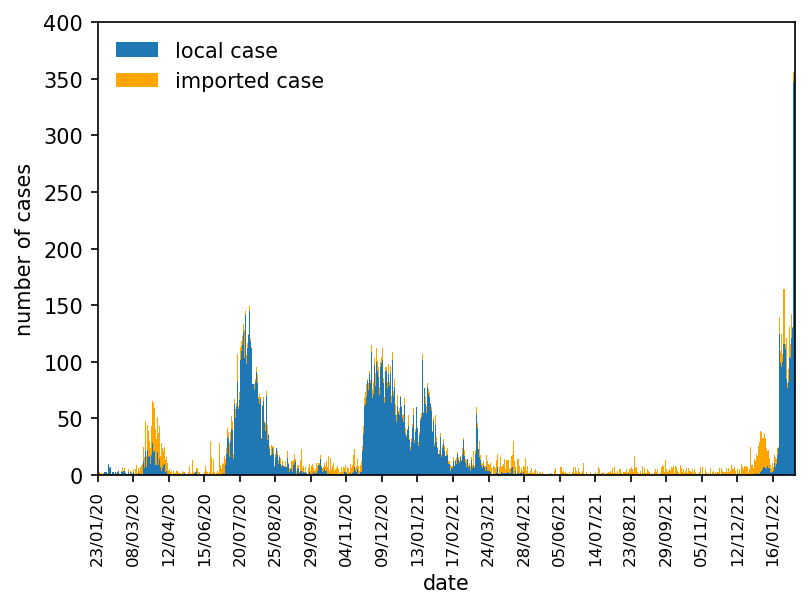

In [5]:
#%% figure 2
newdate = date.str[:6] + date.str[8:10]
plt.figure(dpi = 150)
plt.bar(newdate, local, width = 1, label = 'local case')
plt.bar(newdate, imported, width = 1, bottom = local, color = 'orange', label = 'imported case')
plt.xticks(range(0,len(date),35), rotation = 'vertical', size = 8)
plt.legend(frameon = False, loc = 'upper left')
plt.xlabel('date')
plt.xlim(0, len(newdate))
plt.ylim(0, 400)
plt.ylabel('number of cases')
plt.show()

c) Using the same CSV file as (b), now consider three columns “Report date”, “Gender”, and “Age”. Plot the age and gender distribution of the cases with a bar chart. The patients' ages are binned into tens.

In [6]:
#%% get data
dfc = pd.read_csv("enhanced_sur_covid_19_eng.csv")
dfc.dropna(subset = ["Gender"],inplace=True)
dfc.dropna(subset = ["Age"],inplace=True)
dfc.drop(dfc[dfc['Gender'] == 'Pending'].index, inplace=True)
dfc.drop(dfc[dfc['Age'] == 'Pending'].index, inplace=True)
dfc = dfc.reset_index(drop=True)

dfc['Age'].replace('<1','0',inplace = True)
dfc = dfc.reset_index(drop=True)
dfc['Age'] = dfc['Age'].astype(int)

#%% interval
total = len(dfc)
male = np.zeros(11)
female = np.zeros(11)
for i in range(10):
    male[i]=len(dfc[(dfc['Gender'] == 'M') \
                    & (dfc['Age']>= 10*i)& \
                        (dfc['Age']< 10*i +9)])
    female[i]=len(dfc[(dfc['Gender'] == 'F') \
                      & (dfc['Age']>= 10*i)& \
                          (dfc['Age']< 10*i +9)])
        
male[10] = len(dfc[(dfc['Gender'] == 'M') & (dfc['Age']>= 100)])
female[10] = len(dfc[(dfc['Gender'] == 'F') & (dfc['Age']>= 100)])
male1=[-i/total for i in male]
female1=[j/total for j in female]

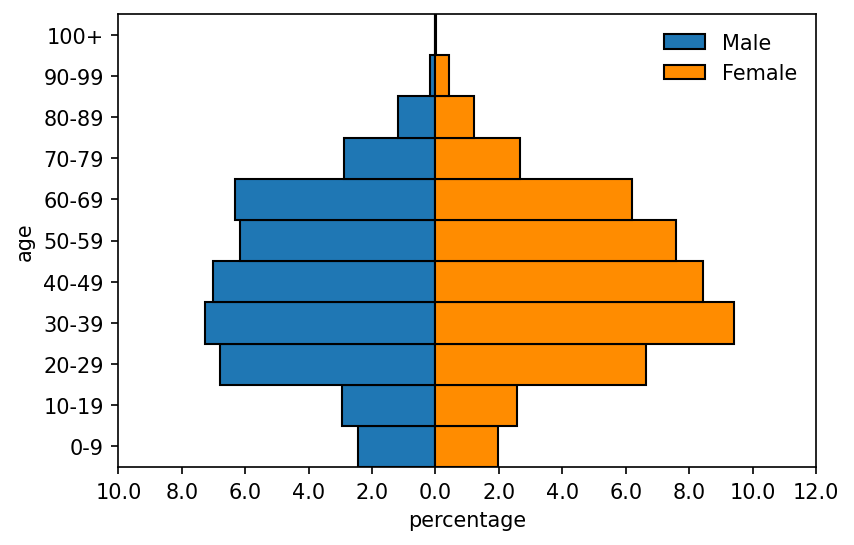

In [7]:
plt.figure(dpi = 150)
plt.barh(range(len(male)), male1, label='Male', height = 1, edgecolor = 'black')
plt.barh(range(len(female)), female1, label='Female', height = 1, color = 'darkorange', edgecolor = 'black')
plt.xlim((-0.1,0.12))
plt.ylim((-0.5, 10.5))
plt.xticks((-0.1, -0.08, -0.06, -0.04, -0.02, \
            -0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12),\
           ('10.0', '8.0', '6.0', '4.0', '2.0', '0.0',\
            '2.0', '4.0', '6.0', '8.0', '10.0', '12.0'))
plt.yticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),\
           ('0-9', '10-19', '20-29', '30-39', \
            '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'))
plt.legend(frameon = False)
plt.xlabel('percentage')
plt.ylabel('age')
plt.show()